# Short-term plasticity

In [1]:
import brainpy as bp
import brainmodels

import matplotlib.pyplot as plt

Let's first look at short-term plasticity. We will start with the results of the experiment. The figure shows the changes of the membrane potential of postsynaptic neurons as the firing of presynaptic neurons. We can see that when the presynaptic neurons repeatedly firing with short intervals, the response of the postsynaptic neurons becomes weaker and weaker, showing a short term depression. But the response recovers after a short period of time, so this plasticity is short-term.

<img src="../../images/stp.png">


The formula of the model is as follows. Here, the short term plasticity is described mainly by variables $u$ and $x$. Where $u$ represents the probability of neurotransmitter release, the initial value is 0, and increase with the firing of presynaptic neurons, contributing to the short-term facilitation (STF); while $x$ represents the residual amount of neurotransmitters, the initial value is 1, and some of them will be used every time when presynaptic neurons fire, which means that it will decrease, contributing to the short-term depression (STD). Therefore the two directions of facilitation and depression occur simultaneously. $\tau_f$ and $\tau_d$ controls the recovery speed of $u$ and $x$, respectively, and the relationship between them determines which direction of plasticity plays a dominant role.

$$
\frac {dI} {dt} = - \frac I {\tau}
$$

$$
\frac {du} {dt} = - \frac u {\tau_f} 
$$

$$
\frac {dx} {dt} =  \frac {1-x} {\tau_d} 
$$

$$
\rm{if (pre \ fire), then}
\begin{cases} 
u^+ = u^- + U(1-u^-) \\ 
I^+ = I^- + Au^+x^- \\
x^+ = x^- - u^+x^- 
\end{cases}
$$

The code implemented with BrainPy please see [BrainModel](https://github.com/PKU-NIP-Lab/BrainModels).

## STD

When we set the parameters $\tau_d > \tau_f$, $x$ recovers very slowly, and $u$ decays very quickly, so in the end, the transmitter is not enough to open the receptors, showing STD dominants;

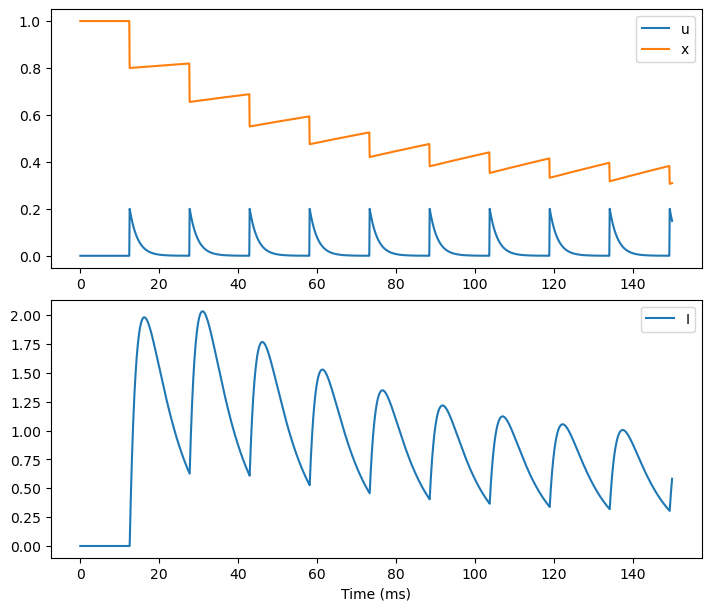

In [2]:
neu1 = brainmodels.neurons.LIF(1)
neu2 = brainmodels.neurons.LIF(1)
syn1 = brainmodels.synapses.STP(neu1, neu2, bp.connect.All2All(), U=0.2, tau_d=150., tau_f=2.)
net = bp.Network(pre=neu1, syn=syn1, post=neu2)

runner = bp.StructRunner(net, inputs=[('pre.input', 28.)], monitors=['syn.I', 'syn.u', 'syn.x'])
runner.run(150.)


# plot
fig, gs = bp.visualize.get_figure(2, 1, 3, 7)

fig.add_subplot(gs[0, 0])
plt.plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label='u')
plt.plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label='x')
plt.legend()

fig.add_subplot(gs[1, 0])
plt.plot(runner.mon.ts, runner.mon['syn.I'][:, 0], label='I')
plt.legend()

plt.xlabel('Time (ms)')
plt.show()

## STF

When $\tau_f > \tau_d$, on the contrary, every time $x$ is used, it will be added back quickly. There are always enough transmitters available. At the same time, the decay of $u$ is very slow, so the probability of releasing transmitters is getting higher and higher, showing STF dominants.

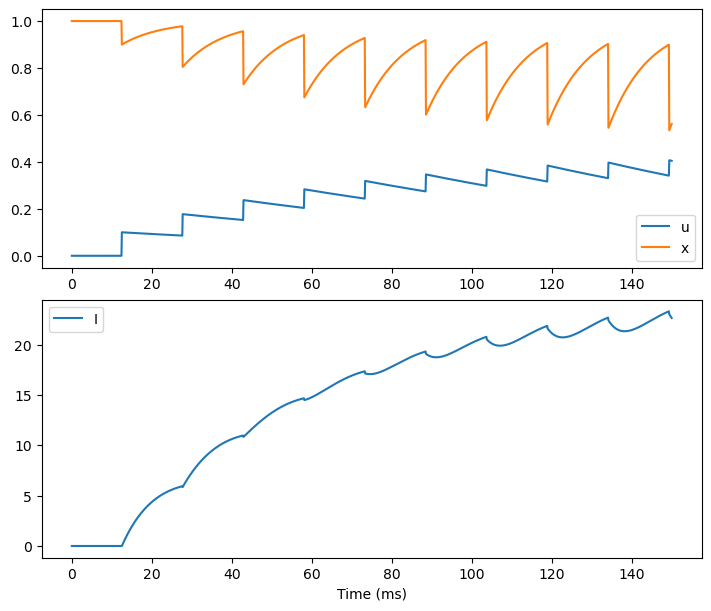

In [3]:
neu1 = brainmodels.neurons.LIF(1)
neu2 = brainmodels.neurons.LIF(1)
syn1 = brainmodels.synapses.STP(neu1, neu2, bp.connect.All2All(), U=0.1, tau_d=10, tau_f=100.)
net = bp.Network(pre=neu1, syn=syn1, post=neu2)

runner = bp.StructRunner(net, inputs=[('pre.input', 28.)], monitors=['syn.I', 'syn.u', 'syn.x'])
runner.run(150.)


# plot
fig, gs = bp.visualize.get_figure(2, 1, 3, 7)

fig.add_subplot(gs[0, 0])
plt.plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label='u')
plt.plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label='x')
plt.legend()

fig.add_subplot(gs[1, 0])
plt.plot(runner.mon.ts, runner.mon['syn.I'][:, 0], label='I')
plt.legend()

plt.xlabel('Time (ms)')
plt.show()